In [1]:
import requests
import pandas as pd
import datetime

In [2]:
import re
from pathlib import Path

## Daten der SVP laden

In [4]:
#Daten laden mit Path, damit die Namen nachher sauber geschrieben sind und ich danach filtern kann
df_raw = pd.read_csv(Path('./SVP_Vorstoesse_14_23_mit_Resultat_bereinigt.csv'), encoding='UTF-8')
df_raw['Datum'] = pd.to_datetime(df_raw['Datum'])
df_svp = df_raw.copy()

# Komischen Leerschlag ersetzen: regex muss auf "True" sein, sonst wird es nur ersetzt, wenn der ganze Inhalt der Zelle dem Suchwert entspricht
df_svp = df_svp.replace(u"\xa0", " ", regex=True)
df_svp

,Titel,Geschäftsart,ID,Datum,Erstunterzeichner,Partei Erstunterzeichner,Mitunterzeichner,Partei Mitunterzeichner,Geschäftsstatus,Entscheid,_entscheidbereinigt
0,Beiträge und Dienstleistungen für mittellose H...,Schriftliche Anfrage,9300f1f882cd4ece9b634ac694c1a1e1,2014-01-08,Roland Scheck,SVP,Urs Fehr,SVP,Abgeschlossen,NaN,NaN
1,Ausstellung «Dada x Statistik» im Cabaret Volt...,Schriftliche Anfrage,0ec0dfeb654d4fed99acc19aef7b6373,2014-01-22,Daniel Regli,SVP,Thomas Schwendener,SVP,Abgeschlossen,NaN,NaN
2,"Asylunterkunft am Wydäckerring, Hintergründe z...",Schriftliche Anfrage,921e1b3c08894f8cb108f8a7245dd787,2014-01-29,Margrit Haller,SVP,Roger Bartholdi,SVP,Abgeschlossen,NaN,NaN
3,"Brand in der Roten Fabrik im Jahr 2012, finanz...",Interpellation,56d2c264de5542ad9749e10dd0c3ceb0,2014-02-05,Daniel Regli,SVP,Thomas Schwendener,SVP,Abgeschlossen,NaN,NaN
4,Exklusive Vergabe der Ticketrechte der Hallens...,Schriftliche Anfrage,7ca5289be14b47a89af6e425faafbb91,2014-02-26,Roland Scheck,SVP,Roger Liebi,SVP,Abgeschlossen,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
649,Verzicht auf die Erhöhung der Taxen in den stä...,Schriftliche Anfrage,9b74321c1fd047c9844224f8e487aca5,2023-11-29,Walter Anken,SVP,Samuel Balsiger,SVP,InBearbeitung,NaN,NaN
650,"Sportanlage Oerlikon, Bericht zu den «Lessons ...",Postulat,fdbb5ebb7fed4bb394ce0342a6293029,2023-11-29,Martin Götzl,SVP,Reto Brüesch,SVP,InBearbeitung,NaN,NaN
651,Verzicht auf den Einsatz von elektronischen Au...,Postulat,e541ea96e7c340c99d6d0c2c5e7c3ef6,2023-12-06,Derek Richter,SVP,Stephan Iten,SVP,InBearbeitung,Ablehnung,Ablehnung
652,"Ertrag aus Ordnungsbussen, Reduzierung des bud...",Postulat,b52db7bc3ce14d8c89215fd22e65478f,2023-12-06,Bernhard im Oberdorf,SVP,Martin Götzl,SVP,Abgeschlossen,Ablehnung,Ablehnung


## Vorstösse pro Woche zählen und mit rollendem Mittel darstellen

In [6]:
# Gruppieren nach Woche, danach nur das Feld "ID" zählen.
df_alle = df_svp.groupby(df_svp.Datum.dt.to_period('W')).agg(anzahl = ('ID', 'count'))

df_alle.head()

,anzahl
Datum,
2014-01-06/2014-01-12,1
2014-01-20/2014-01-26,1
2014-01-27/2014-02-02,1
2014-02-03/2014-02-09,1
2014-02-24/2014-03-02,1


<Axes: title={'center': 'Vorstösse der SVP pro Woche'}, xlabel='Datum'>

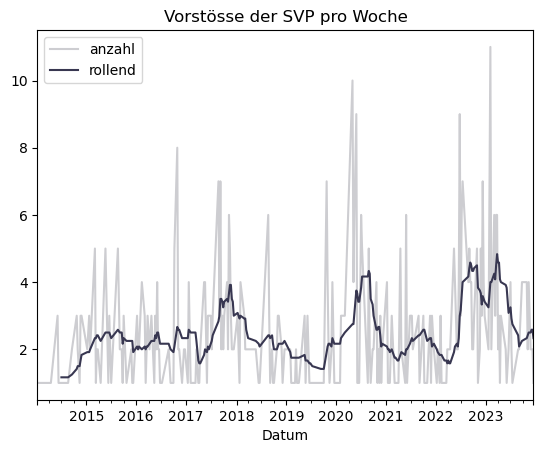

In [7]:
# Rollender Durchschnitt über 12 Wochen hinzufügen
df_alle['rollend'] = df_alle['anzahl'].rolling(window=12).mean()

df_alle.plot(title="Vorstösse der SVP pro Woche", color = ['#cdcdd1', '#383751'])

**Interpretation**: Es ist auffällig, dass die SVP in der laufenden Legislatur aktiver geworden ist. Um genauer zu sehen, was passiert, müssen die Daten noch genauer aufgeschlüsselt werden. Ich unterteile die Vorstösse in jene, die bloss Anfragen sind (Schriftliche Anfrage und Interpellationen) sowie in die gewichtigeren Vorstösse (Postulate und Motionen), die den Stadtrat zum Handeln zwingen.

## Daten speichern

In [8]:
df_alle

,anzahl,rollend
Datum,,
2014-01-06/2014-01-12,1,NaN
2014-01-20/2014-01-26,1,NaN
2014-01-27/2014-02-02,1,NaN
2014-02-03/2014-02-09,1,NaN
2014-02-24/2014-03-02,1,NaN
...,...,...
2023-11-06/2023-11-12,4,2.500000
2023-11-20/2023-11-26,2,2.500000
2023-11-27/2023-12-03,2,2.583333


In [9]:
df_alle.to_csv("Grafik_alle_Vorstösse_SVP.csv", index=False)

In [10]:
df_alle.reset_index(inplace=True)
df_alle

,Datum,anzahl,rollend
0,2014-01-06/2014-01-12,1,NaN
1,2014-01-20/2014-01-26,1,NaN
2,2014-01-27/2014-02-02,1,NaN
3,2014-02-03/2014-02-09,1,NaN
4,2014-02-24/2014-03-02,1,NaN
...,...,...,...
255,2023-11-06/2023-11-12,4,2.500000
256,2023-11-20/2023-11-26,2,2.500000
257,2023-11-27/2023-12-03,2,2.583333
258,2023-12-04/2023-12-10,2,2.583333


In [11]:
df_alle.to_csv("Grafik_alle_Vorstösse_SVP_neu.csv", index=False)

## Vorstösse unterteilen und separat darstellen

In [12]:
#Interpellationen und Anfragen rausfiltern
df_anfragen = df_svp[(df_svp["Geschäftsart"] == "Interpellation") | (df_svp["Geschäftsart"] == "Schriftliche Anfrage")]
df_anfragen

,Titel,Geschäftsart,ID,Datum,Erstunterzeichner,Partei Erstunterzeichner,Mitunterzeichner,Partei Mitunterzeichner,Geschäftsstatus,Entscheid,_entscheidbereinigt
0,Beiträge und Dienstleistungen für mittellose H...,Schriftliche Anfrage,9300f1f882cd4ece9b634ac694c1a1e1,2014-01-08,Roland Scheck,SVP,Urs Fehr,SVP,Abgeschlossen,NaN,NaN
1,Ausstellung «Dada x Statistik» im Cabaret Volt...,Schriftliche Anfrage,0ec0dfeb654d4fed99acc19aef7b6373,2014-01-22,Daniel Regli,SVP,Thomas Schwendener,SVP,Abgeschlossen,NaN,NaN
2,"Asylunterkunft am Wydäckerring, Hintergründe z...",Schriftliche Anfrage,921e1b3c08894f8cb108f8a7245dd787,2014-01-29,Margrit Haller,SVP,Roger Bartholdi,SVP,Abgeschlossen,NaN,NaN
3,"Brand in der Roten Fabrik im Jahr 2012, finanz...",Interpellation,56d2c264de5542ad9749e10dd0c3ceb0,2014-02-05,Daniel Regli,SVP,Thomas Schwendener,SVP,Abgeschlossen,NaN,NaN
4,Exklusive Vergabe der Ticketrechte der Hallens...,Schriftliche Anfrage,7ca5289be14b47a89af6e425faafbb91,2014-02-26,Roland Scheck,SVP,Roger Liebi,SVP,Abgeschlossen,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
638,Eignung der Flexity-Trams für mobilitätseinges...,Schriftliche Anfrage,34d41e93c3f9435382880725b4223e86,2023-10-25,Michele Romagnolo,SVP,Sebastian Zopfi,SVP,Abgeschlossen,NaN,NaN
639,Kostenentwicklung beim Neubau des Sportzentrum...,Schriftliche Anfrage,7dbfe11908824d95a212b35dda88840d,2023-10-25,Martin Götzl,SVP,Reto Brüesch,SVP,InBearbeitung,NaN,NaN
640,"Littering rund um das Seebecken, präventive Ka...",Schriftliche Anfrage,839ab7983c4a4e338c406167c20397d7,2023-10-25,Martin Götzl,SVP,Michele Romagnolo,SVP,InBearbeitung,NaN,NaN
647,"Kriterien für die Vergabe von Alterswohnungen,...",Schriftliche Anfrage,9dbc720ba15a4356bd3a3eaeb97cc8d5,2023-11-22,David Ondraschek,Die Mitte,Walter Anken,SVP,InBearbeitung,NaN,NaN


In [13]:
# Gruppieren nach Woche, danach nur das Feld "ID" zählen.
df_an_graf = df_anfragen.groupby(df_anfragen.Datum.dt.to_period('W')).agg(anzahl = ('ID', 'count'))

# So siehts aktuell aus, ein Wert pro Woche
df_an_graf.head()

,anzahl
Datum,
2014-01-06/2014-01-12,1
2014-01-20/2014-01-26,1
2014-01-27/2014-02-02,1
2014-02-03/2014-02-09,1
2014-02-24/2014-03-02,1


<Axes: title={'center': 'Anfragen der SVP pro Woche'}, xlabel='Datum'>

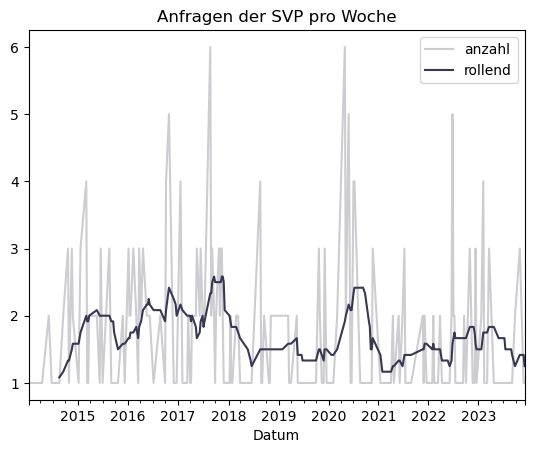

In [17]:
# Rollender Durchschnitt über 12 Wochen hinzufügen
df_an_graf['rollend'] = df_an_graf['anzahl'].rolling(window=12).mean()

df_an_graf.plot(title="Anfragen der SVP pro Woche", color = ['#cdcdd1', '#383751'])

In [15]:
# Postulate und Motionen rausfiltern
df_mp = df_svp[(df_svp["Geschäftsart"] == "Postulat") | (df_svp["Geschäftsart"] == "Motion")]
df_mp

,Titel,Geschäftsart,ID,Datum,Erstunterzeichner,Partei Erstunterzeichner,Mitunterzeichner,Partei Mitunterzeichner,Geschäftsstatus,Entscheid,_entscheidbereinigt
8,Parkplätze bei der Kirche Unterdorf in Zürich-...,Postulat,2c561e715fd64a409a47bf58ef09214d,2014-06-04,Daniel Regli,SVP,Roberto Bertozzi,SVP,Abgeschlossen,"Überweisung, Frist 24 Monate",Überweisung
11,Senkung der Umsatzabgabe des ewz an die Stadtk...,Postulat,ecad9c23e08b4fa297d5399b6b43bf49,2014-06-11,Martin Bürlimann,SVP,Roberto Bertozzi,SVP,Abgeschlossen,"Überweisung, Frist 24 Monate",Überweisung
20,"Metallrückgewinnung aus Kehrichtschlacke, Rück...",Postulat,714ec5ab53464ffdb8b4e7f0a24908af,2014-10-29,Martin Bürlimann,SVP,Kurt Hüssy,SVP,Abgeschlossen,"Überweisung, Frist 24 Monate",Überweisung
22,Verkauf des Kochareals in Altstetten an den Me...,Postulat,7506e23a71fd4cbebbcc1a8d1f4c57e0,2014-11-12,Urs Fehr,SVP,Katharina Widmer,SVP,Abgeschlossen,Ablehnung,Ablehnung
26,Gemeindestrasse zwischen Platten- und Freiestr...,Postulat,0d0ec40406b04adcbe385820e5931be4,2014-11-26,Urs Fehr,SVP,Roger Liebi,SVP,Abgeschlossen,Ablehnung,Ablehnung
...,...,...,...,...,...,...,...,...,...,...,...
648,Verzicht auf eine Erhöhung der Lohnsumme ab de...,Postulat,96fbcf064e3646d3b40d29ddc48475c3,2023-11-22,Johann Widmer,SVP,Martin Götzl,SVP,Abgeschlossen,Ablehnung,Ablehnung
650,"Sportanlage Oerlikon, Bericht zu den «Lessons ...",Postulat,fdbb5ebb7fed4bb394ce0342a6293029,2023-11-29,Martin Götzl,SVP,Reto Brüesch,SVP,InBearbeitung,NaN,NaN
651,Verzicht auf den Einsatz von elektronischen Au...,Postulat,e541ea96e7c340c99d6d0c2c5e7c3ef6,2023-12-06,Derek Richter,SVP,Stephan Iten,SVP,InBearbeitung,Ablehnung,Ablehnung
652,"Ertrag aus Ordnungsbussen, Reduzierung des bud...",Postulat,b52db7bc3ce14d8c89215fd22e65478f,2023-12-06,Bernhard im Oberdorf,SVP,Martin Götzl,SVP,Abgeschlossen,Ablehnung,Ablehnung


In [16]:
# Gruppieren nach Woche, danach nur das Feld "ID" zählen.
df_mp_graf = df_mp.groupby(df_mp.Datum.dt.to_period('W')).agg(anzahl = ('ID', 'count'))

# So siehts aktuell aus, ein Wert pro Woche
df_mp_graf.head()

,anzahl
Datum,
2014-06-02/2014-06-08,1
2014-06-09/2014-06-15,1
2014-10-27/2014-11-02,1
2014-11-10/2014-11-16,1
2014-11-24/2014-11-30,1


<Axes: title={'center': 'Motionen und Postulate der SVP pro Woche'}, xlabel='Datum'>

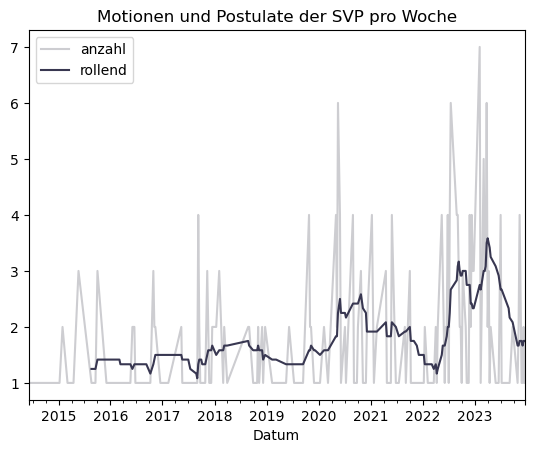

In [18]:
# Rollender Durchschnitt über 12 Wochen hinzufügen
df_mp_graf['rollend'] = df_mp_graf['anzahl'].rolling(window=12).mean()

df_mp_graf.plot(title="Motionen und Postulate der SVP pro Woche", color = ['#cdcdd1', '#383751'])

**Interpretation**: Aus der seperaten Darstellung wird deutlich, dass die SVP vor allem bei den Postulaten und Motionen stark zugelegt hat, also bei den gewichtigen Vorstössen. Sie versucht also offensichtlich, im Parlament mehr zu bewegen.